# 08-3 합성곱 신경망의 시각화
합성곱 층의 가중치와 특성 맵을 시각화하여 신경망이 이미지에서 어떤 것을 학습하는지 이해해 본다.

## 가중치 시각화
합성곱 층은 여러 개의 필터를 사용해 이미지에서 특징을 학습한다. 각 필터는 커널이라 부르는 가중치와 절편을 가지고 있다. 일반적으로 절편은 시각적으로 의미가 없다. 가중치는 입력 이미지의 2차원 영역에 적용되어 어떤 특징을 크게 두드러지게 표현하는 역할을 한다.
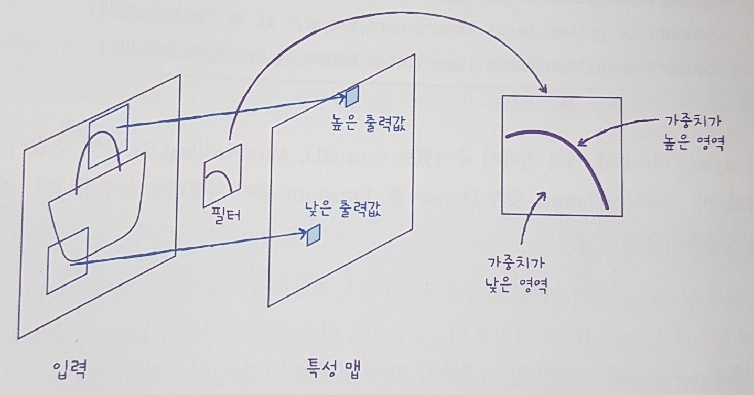

가중치 시각화란 합성곱 층의 가중치를 이미지로 출력하는 것을 말한다. 합성곱 신경망은 주로 이미지를 다루기 때문에 가중치가 시각적인 패턴을 학습하는지 알아볼 수 있다.

In [3]:
from tensorflow import keras
model = keras.models.load_model('best-cnn-model.h5')

In [4]:
model.layers

In [7]:
# 첫 번째 합성곱 층의 가중치 조사
# layers 속성의 첫 번째 원소를 선택해 weights의 첫 번째 원소(가중치)와 두 번째 원소(절편)의 크기를 출력
conv = model.layers[0]
print(conv.weights[0].shape, conv.weights[1].shape)

# 이전 절에서 커널 크기를 (3, 3)으로 지정함
# 이 합성곱 층에 전달되는 입력의 깊이가 1이므로 실제 커널 크기는 (3, 3, 1)이다.
# 또 필터 개수가 32개이므로 weights의 첫 번째 원소의 가중치의 크기는 (3, 3, 1, 32)가 되었다.
# weights의 두 번째 원소는 절편의 개수를 나타낸다. 필터마다 1개의 절편이 있으므로 (32,) 크기가 된다.

(3, 3, 1, 32) (32,)


In [8]:
# 가중치 배열의 평균과 표준편차를 넘파이 mean() 메서드와 std() 메서드로 계산
conv_weights = conv.weights[0].numpy()
print(conv_weights.mean(), conv_weights.std())

-0.024909314 0.26068315


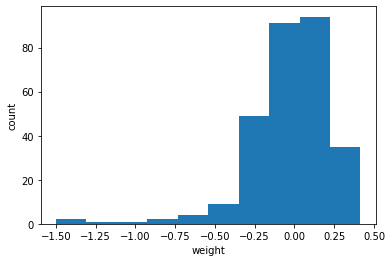

In [9]:
# 이 가중치가 어떤 분포를 가졌는지 직관적으로 이해하기 쉽도록 히스토그램을 그린다.
import matplotlib.pyplot as plt
plt.hist(conv_weights.reshape(-1,1))
plt.xlabel('weight')
plt.ylabel('count')
plt.show()

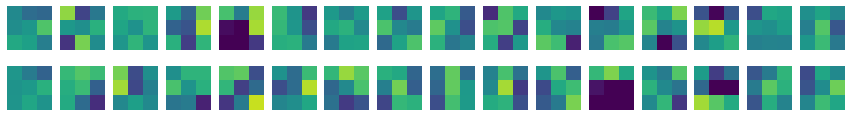

In [10]:
# 훈련된 합성곱 신경망에서 사용된 필터(32개)의 각 가중치 시각화
fig, axs = plt.subplots(2, 16, figsize=(15,2))
for i in range(2):
  for j in range(16):
    axs[i, j].imshow(conv_weights[:,:,0,i*16+j], vmin=-0.5, vmax=0.5)
    axs[i, j].axis('off')
plt.show()

In [11]:
# 훈련하지 않은 합성곱 신경망에서의 필터의 각 가중치 시각화
no_training_model = keras.Sequential()
no_training_model.add(keras.layers.Conv2D(32, kernel_size=3, activation='relu', padding='same', input_shape=(28,28,1)))

In [12]:
no_training_conv = no_training_model.layers[0]
print(no_training_conv.weights[0].shape)

(3, 3, 1, 32)


In [13]:
no_training_weights = no_training_conv.weights[0].numpy()
print(no_training_weights.mean(), no_training_weights.std())

-0.0033176807 0.08387546


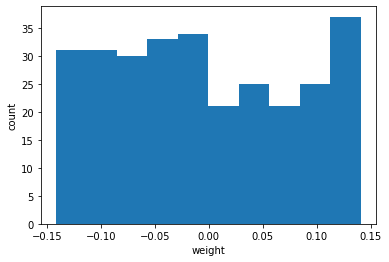

In [14]:
plt.hist(no_training_weights.reshape(-1, 1))
plt.xlabel('weight')
plt.ylabel('count')
plt.show()

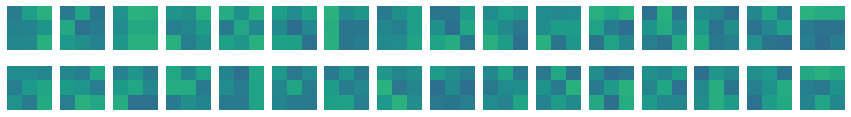

In [16]:
# 훈련된 합성곱 신경망에서 사용된 필터의 각 가중치 시각화
fig, axs = plt.subplots(2, 16, figsize=(15,2))
for i in range(2):
  for j in range(16):
    axs[i, j].imshow(no_training_weights[:,:,0,i*16+j], vmin=-0.5, vmax=0.5)
    axs[i, j].axis('off')
plt.show()

# 히스토그램에서 보았듯이 전체적으로 가중치가 밋밋하게 초기화되었다.
# 이는 이전 가중치에서는 합성곱 신경망이 패션 MNIST 데이터셋의 분류 정확도를 높이기 위해 유용한 패턴을 학습했다는 사실을 알 수 있음.

## 함수형 API
케라스에서 신경망 모델을 만드는 방법 중 하나이다. Model 클래스에 모델의 입력과 출력을 지정한다. 전형적으로 입력은 Input() 함수를 사용하여 정의하고 출력은 마지막 층의 출력으로 정의한다.

In [17]:
# 특성 맵 시각화를 만드는 데 함수형 API가 필요하고, 그 이유는 합성곱 층의 출력한 특성 맵이 필요하기 때문이다.

# 첫 번째 합성곱 층
# model.input으로 모델의 입력을 간단히 얻을 수 있다.
print(model.input)
# model.layers[0].output으로 첫 번째 합성곱 층의 출력을 얻을 수 있다.
print(model.layers[0].output)

KerasTensor(type_spec=TensorSpec(shape=(None, 28, 28, 1), dtype=tf.float32, name='conv2d_input'), name='conv2d_input', description="created by layer 'conv2d_input'")
KerasTensor(type_spec=TensorSpec(shape=(None, 28, 28, 32), dtype=tf.float32, name=None), name='conv2d/Relu:0', description="created by layer 'conv2d'")


In [18]:
conv_acti = keras.Model(model.input, model.layers[0].output)

## 특성 맵 시각화
합성곱 층의 활성화 출력을 이미지로 그리는 것을 말한다. 가중치 시각화와 함께 비교하여 각 필터가 이미지의 어느 부분을 활성화시키는지 확인할 수 있다.

4422102/4422102 [==============================] - 0s 0us/step


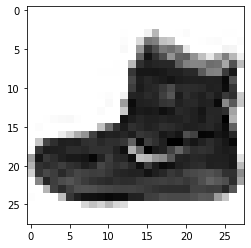

In [19]:
# 케라스로 패션 MNIST 데이터셋을 읽은 후 훈련 세트에 있는 첫 번째 샘플을 그려봄
(train_input, train_target), (test_input, test_target) = keras.datasets.fashion_mnist.load_data()
plt.imshow(train_input[0], cmap='gray_r')
plt.show()

In [20]:
# 이 샘플을 conv_acti 모델에 주입하여 Conv2D 층이 만드는 특성 맵을 출력해 본다.
inputs = train_input[0:1].reshape(-1,28,28,1)/255.0
feature_maps = conv_acti.predict(inputs)

1/1 [==============================] - 8s 8s/step


In [21]:
print(feature_maps.shape)

(1, 28, 28, 32)


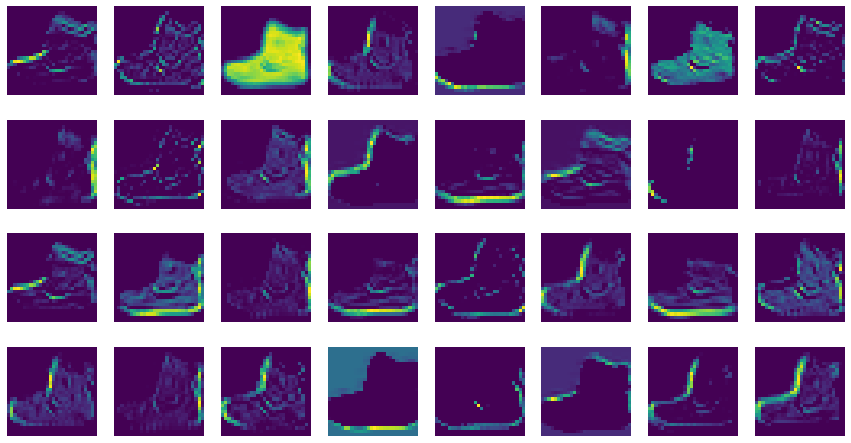

In [22]:
fig, axs = plt.subplots(4, 8, figsize=(15,8))
for i in range(4):
  for j in range(8):
    axs[i, j].imshow(feature_maps[0,:,:,i*8+j])
    axs[i, j].axis('off')
plt.show()

# 이 특성 맵은 32개의 필터로 인해 입력 이미지에서 강하게 활성화된 부분을 보여 준다. (첫번째 합성곱 층)

In [23]:
conv2_acti = keras.Model(model.input, model.layers[2].output)

In [24]:
inputs = train_input[0:1].reshape(-1,28,28,1)/255.0
feature_maps = conv2_acti.predict(inputs)

1/1 [==============================] - 0s 82ms/step


In [25]:
print(feature_maps.shape)

(1, 14, 14, 64)


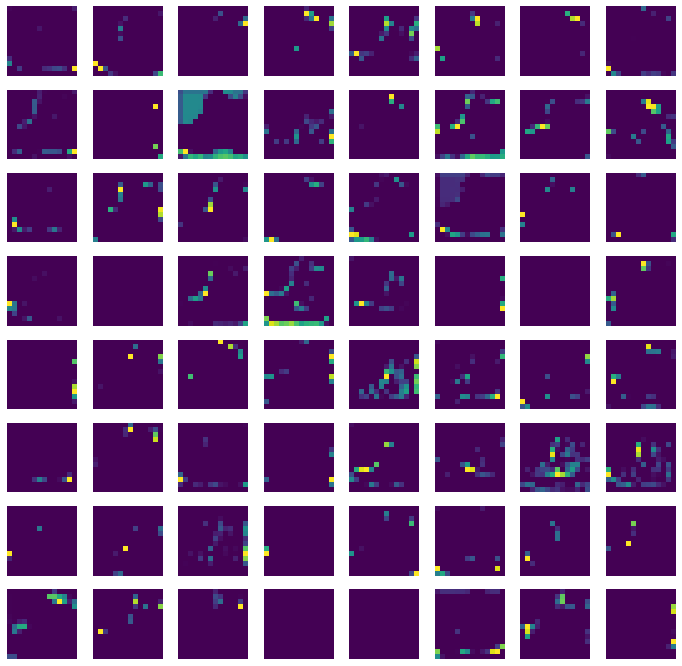

In [26]:
fig, axs = plt.subplots(8, 8, figsize=(12,12))
for i in range(8):
  for j in range(8):
    axs[i, j].imshow(feature_maps[0,:,:,i*8+j])
    axs[i, j].axis('off')
plt.show()

# 이 특성 맵은 64개의 필터로 인해 입력 이미지에서 강하게 활성화된 부분을 보여 준다. (두번째 합성곱 층)

In [27]:
# 이 특성 맵은 시각적으로 이해하기 어렵다! 왜 이런 결과가 나올까!?!
# 합성곱 신경망의 앞부분에 있는 합성곱 층은 이미지의 시각적인 정보를 감지하고 뒤쪽에 있는 합성곱 층은 앞쪽에서 감지한 시각적인 정보를 바탕으로 추상적인 정보를 학습한다.